# Data Wrangling

In [2]:
# import package
import pandas as pd

In [3]:
# load data
cars = pd.read_csv('C:/Users/melan/OneDrive/Documents/Entity/Final Project/Car-Sales-Data.csv')
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [4]:
# rename the engine type column
cars.rename(columns={'Engine Type' : 'EngineType'}, inplace=True)
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [5]:
# drop irrelevant variables registration and model
cars.drop(['Registration','Model'], axis=1, inplace=True)
cars.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999


In [6]:
# delete NaN values
cars.dropna(inplace=True)
cars1=cars.dropna().reset_index(drop=True)
cars1.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,2016
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999


In [7]:
# drop any rows that have 0 in the miles column
cars2 = cars1[cars1.Mileage != 0]
cars2.head(10)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
6,BMW,6100.0,sedan,438,2.0,Gas,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,1999
10,Renault,11950.0,vagon,177,1.5,Diesel,2011


### The data looks much cleaner. Now, need to convert non numeric variables to numeric.

In [8]:
# check to see which variables are non numeric
cars2.dtypes

Brand          object
Price         float64
Body           object
Mileage         int64
EngineV       float64
EngineType     object
Year            int64
dtype: object

 Brand, Body, and EngineType need to be converted. First, we need to check levels of each variable to see how to recode it.

In [9]:
# levels of Brand
cars2['Brand'].value_counts(sort=True)

Volkswagen       854
Mercedes-Benz    768
BMW              622
Toyota           490
Renault          434
Audi             410
Mitsubishi       300
Name: Brand, dtype: int64

In [10]:
# levels of Body
cars2['Body'].value_counts(sort=True)

sedan        1505
crossover     740
van           612
other         383
vagon         374
hatch         264
Name: Body, dtype: int64

In [11]:
# Levels of EngineType
cars2['EngineType'].value_counts(sort=True)

Diesel    1766
Petrol    1417
Gas        590
Other      105
Name: EngineType, dtype: int64

We'll need to recode 7 levels for the Brand, 6 for the Body, and 4 for the Engine Type

### Recoding

In [12]:
# recoding Brand
cleanup = {"Brand" : {"Volkswagen" : 0, "Mercedes-Benz" : 1, "BMW" : 2, "Toyota" : 3, "Renault" : 4, "Audi" : 5, "Mitsubishi" : 6}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,sedan,277,2.0,Petrol,1991
1,1,7900.0,van,427,2.9,Diesel,1999
2,1,13300.0,sedan,358,5.0,Gas,2003
3,5,23000.0,crossover,240,4.2,Petrol,2007
4,3,18300.0,crossover,120,2.0,Petrol,2011


In [13]:
# recoding Body
cleanup = {"Body" : {"sedan" : 0, "crossover" : 1, "van" : 2, "other" : 3, "vagon" : 4, "hatch" : 5}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,Petrol,1991
1,1,7900.0,2,427,2.9,Diesel,1999
2,1,13300.0,0,358,5.0,Gas,2003
3,5,23000.0,1,240,4.2,Petrol,2007
4,3,18300.0,1,120,2.0,Petrol,2011


In [14]:
# recode Engine Type
cleanup = {"EngineType" : {"Diesel" : 0, "Petrol" : 1, "Gas" : 2, "Other" : 3}}
cars2.replace(cleanup, inplace=True)
cars2.head()

C:\Users\melan\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,1,1991
1,1,7900.0,2,427,2.9,0,1999
2,1,13300.0,0,358,5.0,2,2003
3,5,23000.0,1,240,4.2,1,2007
4,3,18300.0,1,120,2.0,1,2011


Awesome! Now we're ready to start analysis.

## Exploratory Analyses

### For some exploratory analysis, we can do a correlation matrix, look at descriptive statistics, make a few plots for each variable, and finally play around in Tableau.

In [15]:
# pull up our data
cars2.head()

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
0,2,4200.0,0,277,2.0,1,1991
1,1,7900.0,2,427,2.9,0,1999
2,1,13300.0,0,358,5.0,2,2003
3,5,23000.0,1,240,4.2,1,2007
4,3,18300.0,1,120,2.0,1,2011


In [20]:
# create a correlation matrix
corrMatrix = cars2.corr()
corrMatrix

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
Brand,1.000000,-0.072489,-0.025743,-0.090375,-0.016546,0.144501,0.027273
Price,-0.072489,1.000000,-0.115004,-0.438581,0.055377,-0.060847,0.465993
Body,-0.025743,-0.115004,1.000000,-0.003683,-0.062188,-0.159068,0.034537
Mileage,-0.090375,-0.438581,-0.003683,1.000000,0.025224,-0.052043,-0.633868
EngineV,-0.016546,0.055377,-0.062188,0.025224,1.000000,0.057560,-0.030749
EngineType,0.144501,-0.060847,-0.159068,-0.052043,0.057560,1.000000,-0.147873
Year,0.027273,0.465993,0.034537,-0.633868,-0.030749,-0.147873,1.000000


A lot of information, but how about we get a more visual representation?

In [17]:
# open packages
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
cars2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
Brand,1.0,-0.072,-0.026,-0.09,-0.017,0.14,0.027
Price,-0.072,1.0,-0.12,-0.44,0.055,-0.061,0.47
Body,-0.026,-0.12,1.0,-0.0037,-0.062,-0.16,0.035
Mileage,-0.09,-0.44,-0.0037,1.0,0.025,-0.052,-0.63
EngineV,-0.017,0.055,-0.062,0.025,1.0,0.058,-0.031
EngineType,0.14,-0.061,-0.16,-0.052,0.058,1.0,-0.15
Year,0.027,0.47,0.035,-0.63,-0.031,-0.15,1.0


From a glance, it looks as though the year of a used car is correlated with the price of a used car...which makes perfect sense. The year and the body are also mildly correlated, as are the engine type and the enginev. But these are not correlated very much, so really, we should focus more on the year vs the price.

#### Another way of doing some exploratory analyses is by looking at the descriptive stats.

In [23]:
cars2.describe()

,Brand,Price,Body,Mileage,EngineV,EngineType,Year
count,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000,3878.000000
mean,2.338319,17417.471423,1.528881,169.772563,2.767581,0.750903,2006.020113
std,1.930981,21599.147081,1.618365,100.214150,5.023970,0.808673,6.556247
min,0.000000,600.000000,0.000000,1.000000,0.600000,0.000000,1969.000000
25%,1.000000,6900.000000,0.000000,98.250000,1.800000,0.000000,2002.000000
50%,2.000000,10999.000000,1.000000,161.000000,2.200000,1.000000,2007.000000
75%,4.000000,20300.000000,3.000000,232.000000,3.000000,1.000000,2011.000000
max,6.000000,300000.000000,5.000000,980.000000,99.990000,3.000000,2016.000000


Looking at the data, we see we have 3878 total rows of data (after our wrangling and cleaning up). Mean price of a used car is 17,417 dollars-not a bad price since most of these cars are luxury brands. Mean mileage is 169.8 miles. Impressive for a used car. This seems to have come from previous owners who took good care of their vehicles. And the mean year is a 2006. So, in 2022, some of these cars are an average of 16 years old. These are some fantastic used cars!

On further glance, the minimum and maximum price of a car is 600 and 300000. Quite a range! One, or both of these prices, may be an outlier. We'll have to do some more work to see. The minimum mileage is only 1-which means this car may not actually be used, and might need to be dropped from the data. The maximum mileage is 980 miles, which further confirms that our cars in this dataset are well taken care of. And interestingly, the newest car is from 2016, only six years ago, while the oldest car is from 1969! We have a classic car in the mix. Would be interesting to see what the price of that car is.

### Why don't we play around with some histographs and plots?

In [27]:
# make sure seaborn is loaded 
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Count'>

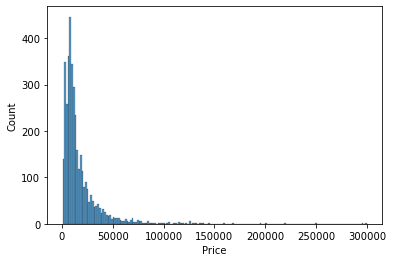

In [31]:
# look at a histograph for each continuous variable
sns.histplot(cars2['Price'])

Wow, this is pretty positively skewed. We'll need to do a transformation on this.

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

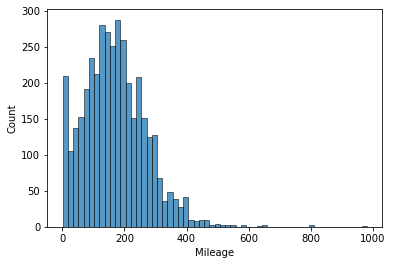

In [32]:
sns.histplot(cars2['Mileage'])

This one is also positively skewed but not as bad as the price.

#### Next we can do the categorical variables by using box plots.

In [34]:
# make sure the libraries are loaded
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Brand'>

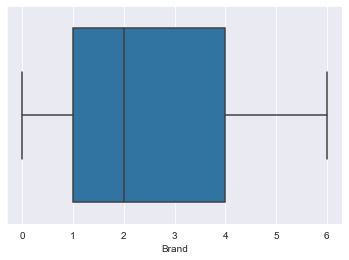

In [35]:
## look at a box plot for the categorical variables
sns.boxplot(x=cars2["Brand"])

<AxesSubplot:xlabel='Body'>

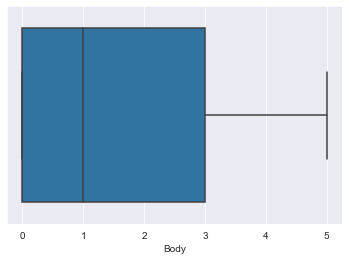

In [36]:
sns.boxplot(x=cars2["Body"])

<AxesSubplot:xlabel='EngineV'>

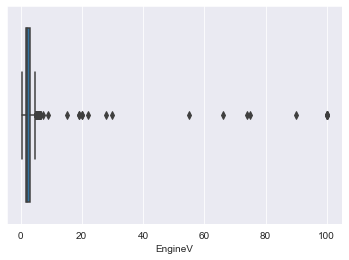

In [37]:
sns.boxplot(x=cars2["EngineV"])

<AxesSubplot:xlabel='EngineType'>

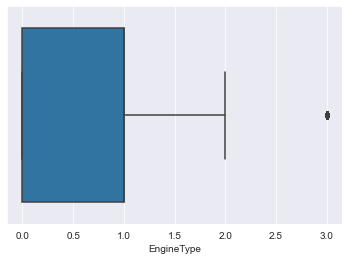

In [38]:
sns.boxplot(x=cars2["EngineType"])

<AxesSubplot:xlabel='Year'>

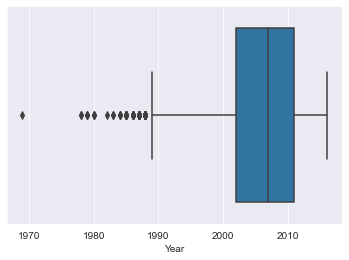

In [39]:
sns.boxplot(x=cars2["Year"])

Some observations by looking at these boxplots: The output shows that the median amount of car brands are BMWs. Also, 50% of the car brands are either BMWs and Toyotas. Median body types are crossovers, while half of the cars are a mix of sedans and crossovers. There seems to be a ton of outliers in the enginev. Almost all the engine types fall somewhere between Diesel and Petrol; there is definitely an outlier there. And in the Year variable, most cars are from 2004 to about 2011, with some outliers in the years between 1969 and 1989.

#### Finally, in our exploratory analyses, we'll look at some of the data in Tableau. In order to do that, we'll make our dataset an excel file so we can connect to it there.

In [43]:
# convert dataframe to a csv file
cars2.to_csv('C:/Users/melan/OneDrive/Desktop/cars.csv')